# 프로젝트 01. 얼굴에 콧수염 스티커 붙이기

['image1.jpg', 'image10.png', 'image2.png', 'image3.png', 'image4.png', 'image5.png', 'image6.png', 'image7.png', 'image8.png', 'image9.png']
image1.jpg faces: 1
[image1.jpg] ENTER face loop
[image1.jpg] OK: 스티커 붙일 수 있는 이미지임
diff(box): 4558559
diff(lm): 4905460
diff(res): 17210381


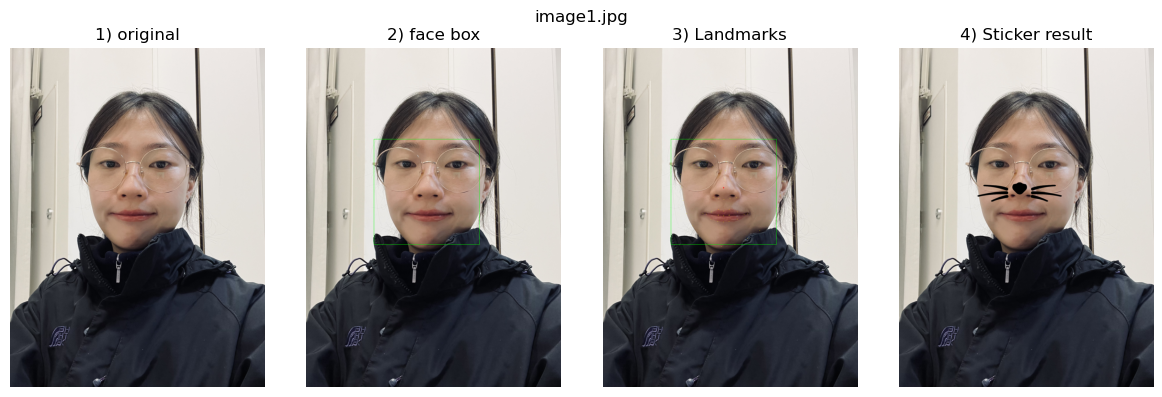

image10.png faces: 1
[image10.png] ENTER face loop
[image10.png] OK: 스티커 붙일 수 있는 이미지임
diff(box): 2860710
diff(lm): 3218736
diff(res): 8121473


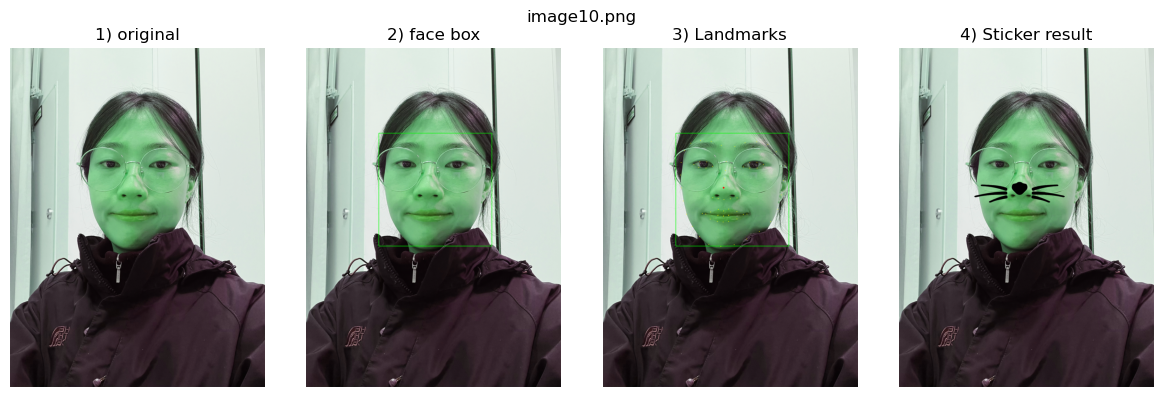

image2.png faces: 1
[image2.png] ENTER face loop
[image2.png] OK: 스티커 붙일 수 있는 이미지임
diff(box): 2777502
diff(lm): 3114432
diff(res): 6704891


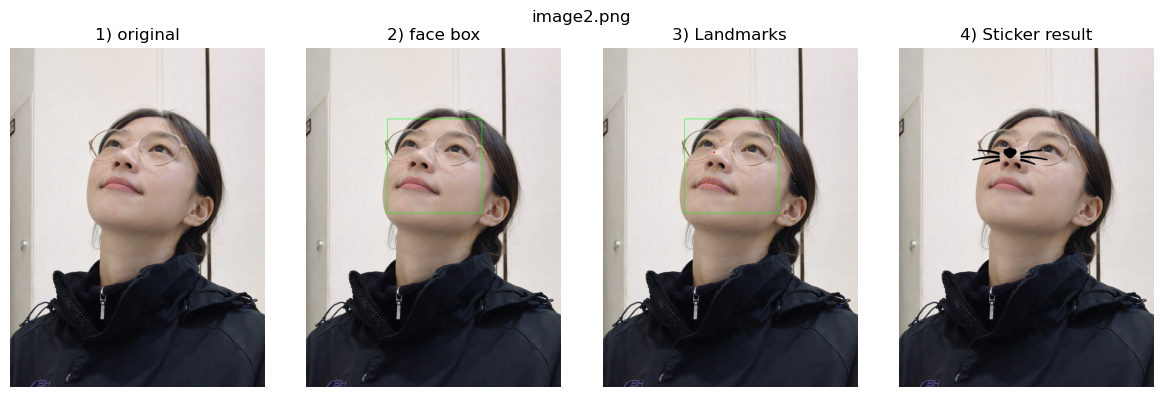

image3.png faces: 1
[image3.png] ENTER face loop
[image3.png] OK: 스티커 붙일 수 있는 이미지임
diff(box): 3333340
diff(lm): 3680609
diff(res): 9653134


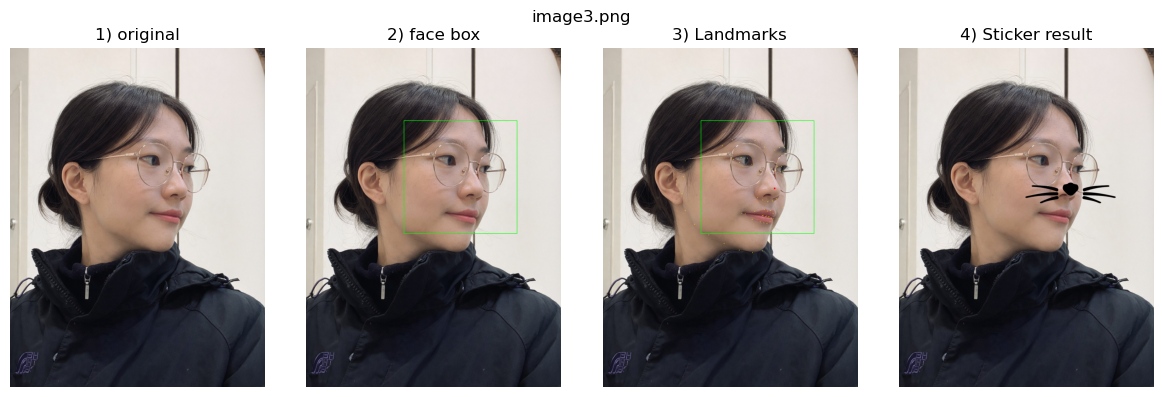

image4.png faces: 1
[image4.png] ENTER face loop
[image4.png] OK: 스티커 붙일 수 있는 이미지임
diff(box): 2959124
diff(lm): 3322982
diff(res): 8245595


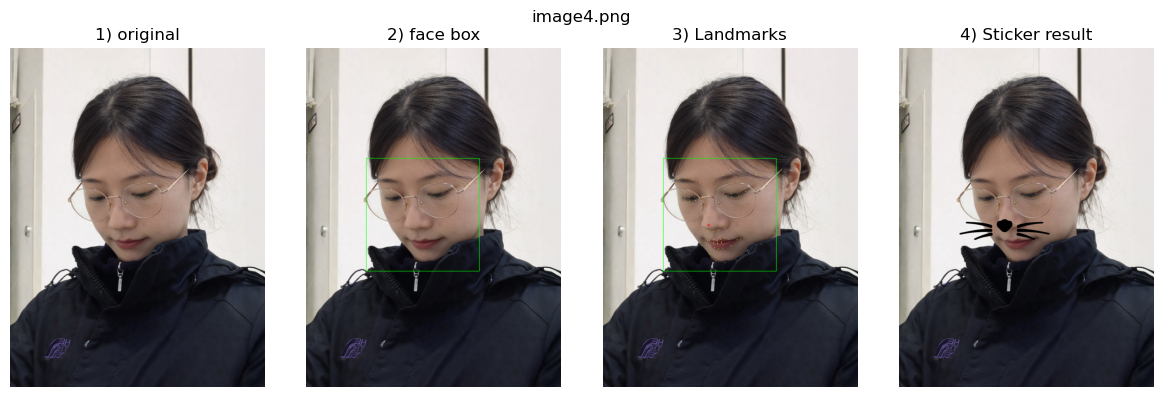

image5.png faces: 1
[image5.png] ENTER face loop
[image5.png] OK: 스티커 붙일 수 있는 이미지임
diff(box): 637597
diff(lm): 949372
diff(res): 395166


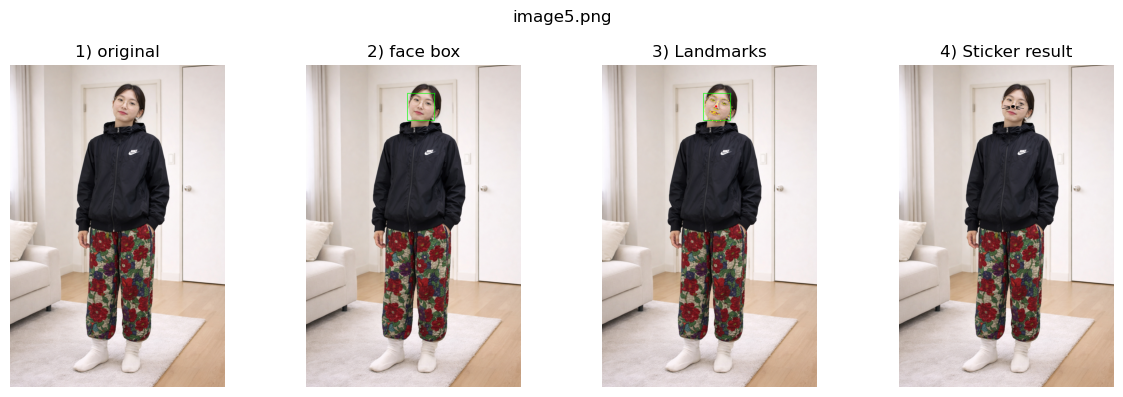

image6.png faces: 1
[image6.png] ENTER face loop
[image6.png] OK: 스티커 붙일 수 있는 이미지임
diff(box): 5544626
diff(lm): 5889734
diff(res): 24645824


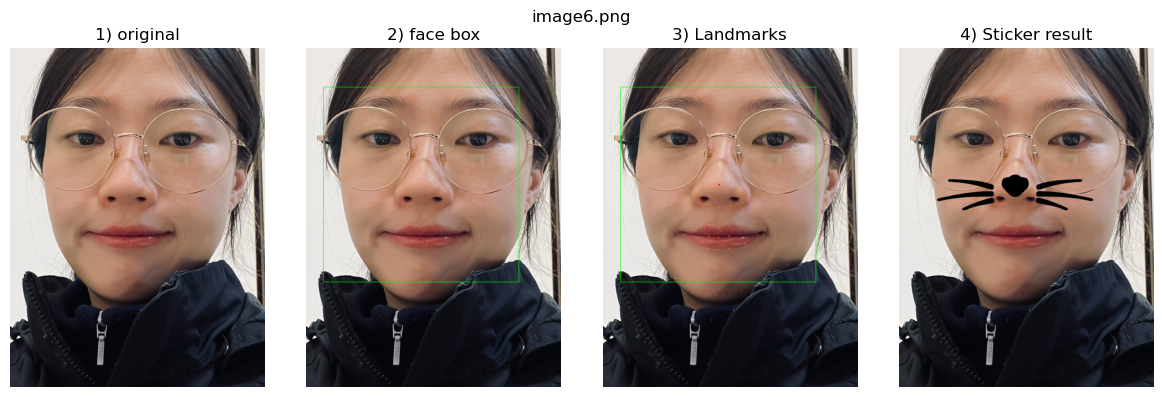

image7.png faces: 0
[스킵] 얼굴 없음: image7.png
image8.png faces: 0
[스킵] 얼굴 없음: image8.png
image9.png faces: 1
[image9.png] ENTER face loop
[image9.png] OK: 스티커 붙일 수 있는 이미지임
diff(box): 2593295
diff(lm): 2988245
diff(res): 4293197


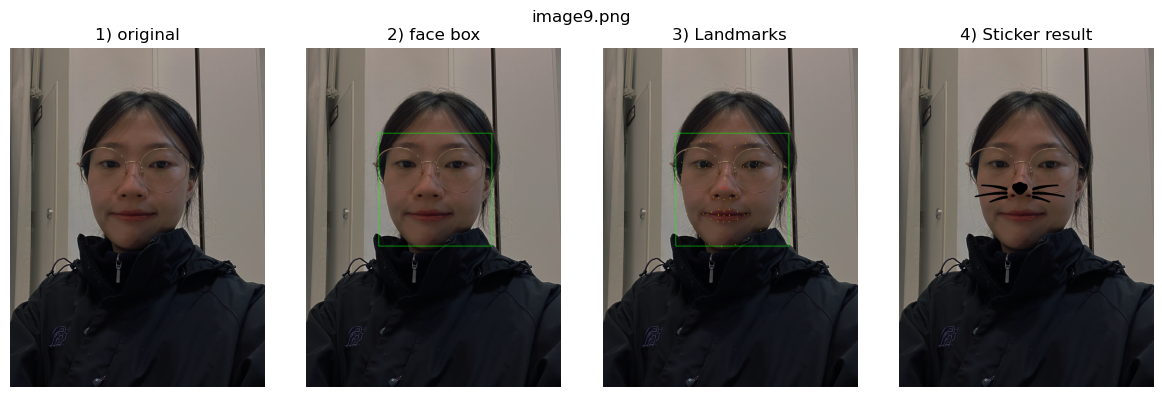

In [1]:
# 필요한 패키지 import 하기
import os # 폴더/파일/경로 관련 도구
import cv2 # 이미지 열고·그리고·저장
import matplotlib.pyplot as plt # 화면에 보여주기
import numpy as np # 계산 특화
import dlib # 얼굴 찾기 분석 도구

# 홈 폴더 기준으로 입력 폴더 위치 정하고, 출력 폴더는 미리 준비
home_dir = os.getenv('HOME') # 내 컴퓨터의 집 주소. 내 홈 폴더 기준으로 경로를 만들기 위해서
# 홈 폴더 + 작업 폴더를 안전하게 이어 붙이는 줄
input_dir = os.path.join(home_dir, 'work/camera_sticker/images/input')
output_dir = os.path.join(home_dir, 'work/camera_sticker/images/output')
os.makedirs(output_dir, exist_ok=True) # 출력 폴더가 없으면 만들어라

# 얼굴 찾는 도구, 얼굴의 점을 찍는 도구 준비
detector_hog = dlib.get_frontal_face_detector() # 얼굴 찾는 도구

# 68개 점의 위치를 어떻게 찾을지 적힌 설명서
model_path = os.path.join(home_dir, 'work/camera_sticker/models/shape_predictor_68_face_landmarks.dat')
# 점의 좌표 (x, y)를 알려주는 역할
landmark_predictor = dlib.shape_predictor(model_path)

# 스티커, 사진 파일 준비
sticker_path = os.path.join(home_dir, 'work/camera_sticker/images/cat-whiskers.png')  # 스티커 파일 주소 만들기
# 스티커를 가져옴. 투명한 부분까지 들고와라(IMREAD_UNCHANGED)
img_sticker_origin = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)

# 사진 파일로 인정할 확장자 목록
valid_ext = (".jpg", ".jpeg", ".png", ".bmp", ".webp")
# 해당 확장자가 포함된 이미지를 소문자로 만들어서 리스트에 넣기
image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(valid_ext)]
image_files.sort() # 가나다(알파벳) 순서로 정렬. 같은 순서의 이미지로 돌리기 위함
print(image_files)

# 중간 진행 과정을 보여주는 사진 출력 어떻게 할지 정함
SHOW_DEBUG = True # 중간 과정(박스, 랜드마크, 결과)을 보여줌. false면 저장만 하고, 출력은 X
SHOW_LIMIT = 10 # 단계별 몇 장까지만 화면에 보여줄지 제한. 노트북 터지는 거 방지용 안전장치
shown_count = 0 # 지금까지 몇 장 보여줬는지 세는 카운터

# 이미지당 원본, 얼굴 박스, 랜드마크, 스티커 결과 출력
def show_4steps(filename, img_original, img_box, img_landmark, img_result):
    fig = plt.figure(figsize=(12, 4)) # 도화지 1장(figure)을 4칸으로 나누고 4장의 사진을 넣음
    
    ax2 = fig.add_subplot(1, 4, 1) # 도화지 안의 칸
    ax2.set_title("1) original")
    ax2.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)) # 이미지를 RGB로 바꿔서 보여줌
    ax2.axis("off") # 축(좌표선)은 숨김
    
    ax2 = fig.add_subplot(1, 4, 2)
    ax2.set_title("2) face box")
    ax2.imshow(cv2.cvtColor(img_box, cv2.COLOR_BGR2RGB))
    ax2.axis("off")
    
    ax3 = fig.add_subplot(1, 4, 3)
    ax3.set_title("3) Landmarks")
    ax3.imshow(cv2.cvtColor(img_landmark, cv2.COLOR_BGR2RGB))
    ax3.axis("off")
    
    ax4 = fig.add_subplot(1, 4, 4)
    ax4.set_title("4) Sticker result")
    ax4.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    ax4.axis("off")
    
    fig.suptitle(filename)
    fig.tight_layout() # 칸 사이 간격 자동 정리
    plt.show()

for filename in image_files: # 이미지 한장씩 for문 돌림
    # 이미지 파일 열기
    # 사진 주소. 폴더만으로는 사진을 못 읽고, 사진 하나의 정확한 주소가 필요해서
    my_image_path = os.path.join(input_dir, filename)
    
    img_bgr = cv2.imread(my_image_path) # OpenCV로 읽기
    # 사진 자체를 못 열었으면 해당 이미지 skip
    if img_bgr is None:
        print(f"[스킵] 읽기 실패: {filename}")
        continue

    # 각 단계별 이미지를 출력하기 위해 복사본 준비 + dlib 계산 위해 색상 변환
    img_original = img_bgr.copy() # 이미지 원본
    img_box = img_bgr.copy() # 얼굴 박스용 이미지 복사본
    img_landmark = img_bgr.copy() # 랜드마크용
    img_result = img_bgr.copy() # 스티커 결과용
    
    # dlib은 RGB를 씀. OpenCV는 brg을 씀. dlib에서 계산을 해야 하니까 RGB로 바꾼 것
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    # 해당 이미지에서 얼굴 탐지하기
    dlib_rects = detector_hog(img_rgb, 1) # 얼굴 탐지 실행
    print(filename, "faces:", len(dlib_rects)) # 얼굴이 몇 개 나왔는지 출력

    # "얼굴 없음"을 에러가 아니라 정상 케이스로 다룸
    if len(dlib_rects) == 0: # 얼굴 0개라면 = 얼굴 탐지가 안됐으면
        print(f"[스킵] 얼굴 없음: {filename}")
        cv2.imwrite(os.path.join(output_dir, filename), img_result) # 얼굴은 없지만 output_dir에 저장
        continue

    # 얼굴 박스/랜드마크/스티커 결과를 각각 따로 저장할 폴더를 미리 만들어 두기
    # for문 밖에 작성해도 되지만, "for문의 책임 범위로 묶어두고 싶어서" for문 안에 작성함
    box_dir = os.path.join(output_dir, "box") # 얼굴 박스 이미지 저장할 폴더 주소
    landmark_dir = os.path.join(output_dir, "landmark") # 랜드마크 이미지 저장할 폴더 주소
    result_dir = os.path.join(output_dir, "result") # 스티커 결과 이미지 저장할 폴더 주소
    
    # box 폴더가 없으면 생성해라, 이미 있으면 넘기고 다음 코드 진행해라.
    os.makedirs(box_dir, exist_ok=True)
    os.makedirs(landmark_dir, exist_ok=True)
    os.makedirs(result_dir, exist_ok=True)

    # 탐지된 얼굴에 박스 그리고 → 점 찍고 → 스티커 붙일 기준점을 정하기
    for dlib_rect in dlib_rects: # 한 이미지에 얼굴이 여러 개 있을 수 있으니까, 얼굴 하나씩 처리하기 위한 반복문
        print(f"[{filename}] ENTER face loop") # 지금 몇 번째 이미지를 처리 중인지 확인하는 로그
        
        # 얼굴 박스 그릴 상하좌우 좌표 저장
        l, t, r, b = dlib_rect.left(), dlib_rect.top(), dlib_rect.right(), dlib_rect.bottom()
        cv2.rectangle(img_box, (l, t), (r, b), (0, 255, 0), 2) # 얼굴 박스용 이미지에 얼굴 사각형 그리기
        cv2.rectangle(img_landmark, (l, t), (r, b), (0, 255, 0), 2) # 랜드마크용 이미지에도 사각형 그림
        
        points = landmark_predictor(img_rgb, dlib_rect) # 68개 얼굴 점 좌표 계산
        # dlib 객체 형태를 일반 좌표 리스트로 변환. 다루기 쉬운 형태로 바꿈
        landmark = [(p.x, p.y) for p in points.parts()]
        # 얼굴의 모든 점을 화면에 표시해서 시각화
        for (lx, ly) in landmark:
            cv2.circle(img_landmark, (lx, ly), 2, (0, 255, 255), -1)


        x, y = landmark[30] # 30번은 "코 끝"을 말함. 이 좌표를 스티커를 붙일 기준점(anchor)으로 사용
        cv2.circle(img_landmark, (x, y), 5, (0, 0, 255), -1) # 기준점이 어디인지 빨간 점으로 강조
        
        # 스티커 크기 설정
        w = int(dlib_rect.width() * 0.8) # 스티커 width를 얼굴 폭의 80% 크기로 맞추기로 함
        h = w # 스티커 가로 세로 크기 같게
        
        # 얼굴 박스가 1픽셀일 때 int(0.8) = 0 → 정수로 바꾸면서 0이 된다.
        # 얼굴 박스가 너무 작아서 스티커가 0이 되면 그냥 skip하라는 안전장치용 코드다.
        if w <= 0:
            continue
        
        img_sticker = cv2.resize(img_sticker_origin, (w, h)) # 원본 스티커를 리사이즈함

        # 스티커 위치 계산 + 스티커가 이미지 바깥으로 나가지 않는지 체크 (붙이기 전 '가능한지' 확인하는 단계)
        # 스티커 내부에서 "코가 위치해야 하는 점"
        sticker_x = int(w * 0.5)
        sticker_y = int(h * 0.45)
        
        # 스티커를 붙이기 시작할 위치. 전체 이미지 기준으로 스티커의 왼쪽, 위 시작점을 말함
        refined_x = x - sticker_x
        refined_y = y - sticker_y
        
        # 스티커가 왼쪽 또는 위쪽으로 삐져나가면 스티커 붙이지 말고 skip
        if refined_x < 0 or refined_y < 0:
            print(f"[{filename}] SKIP: 왼쪽/위쪽으로 삐져나감")
            continue
        
        # 스티커가 오른쪽 또는 아래로 삐져나가면 삐져나가면 스티커 붙이지 말고 skip
        if refined_x + w > img_result.shape[1] or refined_y + h > img_result.shape[0]:
            print(f"[{filename}] SKIP: 오른쪽/아래로 삐져나감")
            continue
        
        print(f"[{filename}] OK: 스티커 붙일 수 있는 이미지임") # 스티커 붙일 수 있다는 확인용 코드

        # 스티커 붙이기
        # 스티커 크기만큼 네모 영역 잘라오기. 이게 배경 역할. refined_x부터 refined_x+w 전까지, refined_y부터 refined_y+h 전까지 스티커 조각 뽑아옴
        roi = img_result[refined_y:refined_y+h, refined_x:refined_x+w].astype(np.float32)
        # [:, :, :3] → 스티커 이미지에서 색상 정보(BGR) 만 추출
        sticker_bgr = img_sticker[:, :, :3].astype(np.float32)
        # 스티커의 알파 채널(투명도) 가져오기
        alpha = (img_sticker[:, :, 3].astype(np.float32) / 255.0)[:, :, None]
        
        # 알파 합성 공식. 알파값이 0인 부분은 투명하게, 1에 가까울수록 색이 나오게끔 하는 수식.
        blended = alpha * sticker_bgr + (1 - alpha) * roi
        # 잘라놨던 영역에 "스티커와 배경이 알파로 섞인 결과(blended)"를 그 위치에 다시 덮어씀
        img_result[refined_y:refined_y+h, refined_x:refined_x+w] = blended.astype(np.uint8)
        
        # 얼굴 박스, 랜드마크, 최종 결과 이미지 저장 + 단계별로 진행됐는지 확인
        # 얼굴박스, 랜드마크, 최종 결과 이미지를 각각 저장
        cv2.imwrite(os.path.join(box_dir, filename), img_box)
        cv2.imwrite(os.path.join(landmark_dir, filename), img_landmark)
        cv2.imwrite(os.path.join(result_dir, filename), img_result)
        
        # 각 단계별 이미지와 원본 차이값을 통해 이미지당 단계들이 진행됐는지 확인
        print("diff(box):", np.sum(np.abs(img_box.astype(np.int32) - img_original.astype(np.int32))))
        print("diff(lm):", np.sum(np.abs(img_landmark.astype(np.int32) - img_original.astype(np.int32))))
        print("diff(res):", np.sum(np.abs(img_result.astype(np.int32) - img_original.astype(np.int32))))

    # 화면에 실제로 출력 + 최종 결과물들을 파일로 저장
    # 이미지 10장을 단계별로 화면에 출력
    if SHOW_DEBUG and shown_count < SHOW_LIMIT:
        show_4steps(filename, img_original, img_box, img_landmark, img_result)
        shown_count += 1
    
    # 최종 결과 이미지를 output_dir 폴더 내 파일로 저장
    save_path = os.path.join(output_dir, filename)
    cv2.imwrite(save_path, img_result)

## 기존 실습 코드와 다르게 진행한 부분
1. **스티커 위치 정하기**<br>
[ 노드 실습 코드 ]<br>
landmark[30][1] - dlib_rect.height()//2<br>
[ 현재 코드 ]<br>
x, y = landmark[30]<br>
→ 이전 실습에서는 왕관의 위치가 머리 위에 있어야 해서, landmark[30][1] - dlib_rect.height()//2 이렇게 했지만,<br>
이번 과제에서는 수염 스티커 위치가 코쪽에 있어야 하기 때문에 x, y를 코 끝점 위치로 잡았다. <br>
→ 코 끝점은 얼굴을 인식한 박스를 기준으로 좌표가 찍히는 게 아니라, 이미지 크기 전체를 기준으로 좌표가 찍힌다.<br>
인식 박스는 전체 이미지에서 얼굴을 찾기 위함이고, 얼굴이 여기 있다는 걸 알면 눈, 코, 입이 어디있는지 인식할 수 있기 때문에 박스가 존재하는 것.<br>
→ 코 좌표 (x, y)는 이미지 전체 기준의 절대 좌표이지만,<br>
그 좌표가 생성되는 기준은 매 이미지마다 인식된 얼굴 위치에 의해 달라진다.<br>
for문으로 여러 이미지를 처리할 때 각 이미지의 코 좌표는 모두 다르지만,<br>
얼굴 박스를 기준으로 한 상대적 구조(얼굴 안에서의 위치)는 유지되기 때문에 수염은 그 상대적 기준에 의해 안정적으로 붙을 수 있다.<br>

2. **스티커 크기 비율 정하기**<br>
w = int(dlib_rect.width() * 0.8)<br>
→ 스티커 크기를 얼굴 비율에 맞추고 싶어서 0.8로 설정함<br>

3. **수염 배경 흰색, 수염 투명색 문제 해결**<br>
img_sticker_origin = cv2.imread(sticker_path, cv2.IMREAD_UNCHANGED)<br>
→ 그리고 이전 코드 그대로 사용해서 고양이 수염 붙이려고 하니, 고양이 수염의 배경이 흰색 + 수염은 투명색으로 나왔었다.<br>
색상 변환이 필요해서 cv2.IMREAD_UNCHANGED를 추가함.<br>

4. **스티커 내부의 코 위치를 0.5, 0.45로 정한 이유**<br>
sticker_x = int(w * 0.5)<br>
sticker_y = int(h * 0.45)<br>
→ 얼굴의 너비를 봤을 때 정중앙은 코다. 코 지점을 정중앙으로 만들어야 하기 때문에 0.5<br>
얼굴의 세로 길이로는 중앙에서 살짝 위에 있는 게 예쁠 것 같아서 0.45로 설정함<br>
<br>

## 프로젝트 진행 중 문제 분석
처음에는 정방향의 얼굴이 잘 잡히겠다 싶은 이미지 1장으로 가지고 코드를 돌리고 고양이 수염 스티커가 잘 붙는 것을 확인하고,<br>
고개를 위,옆,아래로 돌린 사진, 명도가 어두운 사진, 색감을 다르게 만든 사진, 멀리 찍은 사진, 가까이 찍은 사진, 얼굴 각도 자체를 180°, 90° 돌린 사진으로 구성해서 총 10장을 돌렸다.<br>
또한 각 사진별 진행 단계를 파악하기 위해 원본, 얼굴 박스 있는 사진, 랜드마크 있는 사진, 스티커 붙은 사진 이렇게 4단계로 나눠서 출력을 하도록 설정했다.<br>

1. **처음 실험 성공했던 정방향 이미지가 출력이 되지 않는 문제가 생김**<br>
처음 image1만 돌렸을 때는 결과가 잘 나왔는데, 10장으로 돌리니 image9만 출력되었다.<br>
원인: 주피터 노트북을 사용할 때 코드를 알맞게 나눠서 작성하지 않았다. 중복 코드, 들여쓰기 문제로 코드가 정상적으로 진행되지 않았음<br>

2. **코드 정리를 제대로 하고 나니 image1이 제대로 떴으나, 이제는 오히려 image9가 출력이 안되는 상황이 벌어짐**<br>
원인: SHOW_LIMIT = 2로 설정을 한 게 이유<br>
처음에 돌린 이미지 2개만 예시로 뜨도록 설정된 거였다. 코드 자체에서는 이미 다 통과된 이미지들이었다는 걸 뒤늦게 깨달았다.<br>
<br>

### 원인을 파악하기 전, 실행했던 여러가지 시도들
1. resize=2로 해봤음<br>
확실히 실행 속도가 느림<br>

2. png로 통일. 다른 이미지와 같은 크기로 바꿨는데도 안됨<br>

3. image9를 없애봄<br>
혹시 여러장으로 돌려서 탐지 기능이 떨어지나 싶어서.<br>
그러면 image1이 detect가 되는지 보려고.<br>
아무 것도 출력될 게 없어서 오히려 에러가 뜸.<br>
→ 사실 여러장 돌린다고 탐지 기능이 떨어지지는 않는다고 함. 코드를 잘못 작성해서 결과가 안 나올 가능성이 높음.<br>

4. dlib HOG 얼굴 검출기는<br>
→ '사진 밝기 자체'보다는 얼굴의 형태적인 대비(윤곽, 경계, 기울기)를 봄<br>
밝아 보여도 대비가 약하면 detect가 안되고, 어두워보여도 윤곽 대비가 강하면 detect가 된다고 함<br>
코드를 제대로 작성해본 결과, 어둡든 채도 차이든 멀리 있든 측면이든 상관없이 다 제대로 스티커 붙여짐<br>

5. dlib HOG 잘 쓰기 위한 이미지 품질 기준 :
- 얼굴 윤곽이 배경과 명확하게 분리<br>
- 코–눈–입 주변 명암 대비가 분명<br>
- 머리카락/배경 대비가 강함<br>
- 얼굴이 정면에 가깝고 크기도 충분<br>
<br>

## 최종 출력 결과 정리
1) **사진 10장 모두 분석용 이미지로 쓸 수 있는 사진인 것으로 확인**<br>
   얼굴 박스가 그려지는지 아닌지 여부를 따지기 이전에 형식에 맞는 이미지인지 확인 여부부터 진행한다.<br>

2) **image1 ~ image6, image9, image10은 통과**<br>
얼굴 탐지도 되고 스티커도 얼굴에 잘 붙었다.<br>
수염이 이미지 영역 바깥으로 삐져나오지만 않는다면<br>
얼굴 각도가 정방향이 아니어도, 조명이 어두워도, 이미지 색감이 달라도, 멀리/가까이 찍혀도, 얼굴 탐지 및 스티커 붙임 상태도 잘 진행됐다.<br>

3) **image7, image8은 얼굴 박스부터 진행이 안됨**<br>
이 뜻은 이미지로는 쓸 수 있으나 얼굴을 못 찾았다는 뜻이다.<br>
180°, 90°로 얼굴을 돌린 상태에서는 탐지가 안된다고 한다.<br>

## 회고
너무나도 기본적인 규칙을 지키지 않았고, 그런 개념조차 없이 시작했다는 게 부끄러웠던 시간이었습니다. 들여쓰기를 제대로 하지 않고 적절하게 코드를 나누지 않았던 이런 기본을 안 지키니 별의별 노력을 다 하면서 몇시간동안 골머리를 싸맸었어요. "기본을 잘 지키자", "하나 알더라도, 느려도 제대로 알자" 이 가치를 유념하면서 진행해보려고 합니다.